# PERSONAL CAPSTONE

Dataset:[Hotel Reviews](https://data.world/datafiniti/hotel-reviews)

What can be done with this data.

* What are the bottom and top states for hotel reviews by average rating?
* What is the correlation between a state’s population and their number of hotel reviews?
* What is the correlation between a state’s tourism budget and their number of hotel reviews?
* Fit a regression model on reviews and score to see which words are more indicative to a higher/lower score
* Perform a sentiment analysis on the reviews
* Find correlation between reviewer's nationality and scores.
* Beautiful and informative visualization on the dataset.
* Clustering hotels based on reviews
* Simple recommendation engine to the guest who is fond of a special characteristic of hotel.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

import time

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.feature_selection import f_classif, f_regression, SelectKBest


import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

#import plotly.plotly as py
#import plotly.tools as tls

## Import Data

In [2]:
df  = pd.read_csv('datafiniti_hotel_reviews.csv')
print('The shape of the data is:', df.shape)

The shape of the data is: (10000, 26)


In [3]:
display(df.head(1))

,id,dateadded,dateupdated,address,categories,primarycategories,city,country,keys,latitude,...,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username,sourceurls,websites,location
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)


In [4]:
df.columns

Index(['id', 'dateadded', 'dateupdated', 'address', 'categories',
       'primarycategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalcode', 'province', 'reviews_date', 'reviews_dateseen',
       'reviews_rating', 'reviews_sourceurls', 'reviews_text', 'reviews_title',
       'reviews_usercity', 'reviews_userprovince', 'reviews_username',
       'sourceurls', 'websites', 'location'],
      dtype='object')

In [5]:
df.dtypes

id                       object
dateadded                object
dateupdated              object
address                  object
categories               object
primarycategories        object
city                     object
country                  object
keys                     object
latitude                float64
longitude               float64
name                     object
postalcode               object
province                 object
reviews_date             object
reviews_dateseen         object
reviews_rating          float64
reviews_sourceurls       object
reviews_text             object
reviews_title            object
reviews_usercity         object
reviews_userprovince     object
reviews_username         object
sourceurls               object
websites                 object
location                 object
dtype: object

In [6]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

reviews_text               1
reviews_usercity        5836
reviews_userprovince    7295
dtype: int64

In [7]:
## Assumptions: We are just going to Assume that people who didn't fill out the city and State Value 
#Lived in the Same State and City 
## For the empty values in reviews_userprovince replace by the value of province  
## For the empty values in reviews_usercity  replace by the value of city
df['reviews_userprovince'].fillna(value = df['province'], inplace=True)
df['reviews_usercity'].fillna(value = df['city'], inplace=True)

## Explore Data

In [8]:
df = df.drop(['id','keys','reviews_sourceurls','sourceurls','websites','location'],1)

In [9]:
## convert dates to date time object
df['dateadded']=df['dateadded'].str[:10]
df['dateadded'] = pd.to_datetime(df['dateadded'])

df['dateupdated']=df['dateupdated'].str[:10]
df['dateupdated'] = pd.to_datetime(df['dateupdated'])

df['reviews_date'] = df['reviews_date'].str[:10]
df['reviews_date'] = pd.to_datetime(df['reviews_date'])

df['reviews_dateseen']=df['reviews_dateseen'].str[:10]
df['reviews_dateseen'] = pd.to_datetime(df['reviews_dateseen'])

In [10]:
df.dtypes

dateadded               datetime64[ns]
dateupdated             datetime64[ns]
address                         object
categories                      object
primarycategories               object
city                            object
country                         object
latitude                       float64
longitude                      float64
name                            object
postalcode                      object
province                        object
reviews_date            datetime64[ns]
reviews_dateseen        datetime64[ns]
reviews_rating                 float64
reviews_text                    object
reviews_title                   object
reviews_usercity                object
reviews_userprovince            object
reviews_username                object
dtype: object

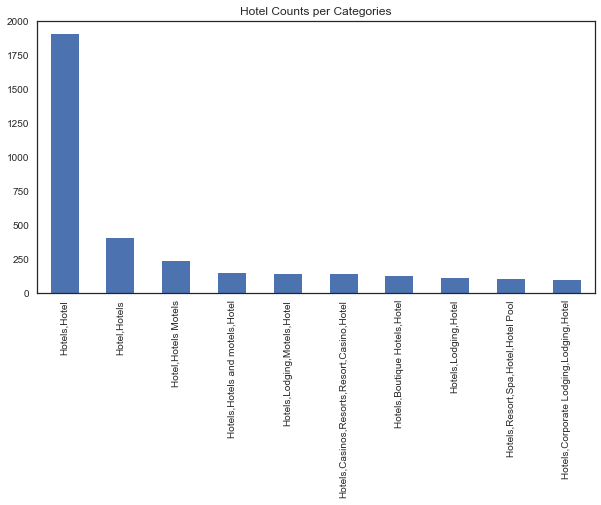

In [11]:
# List of Categories 
plt.figure(figsize=(10, 5))
df.categories.value_counts().head(10).plot(kind='bar')
plt.title('Hotel Counts per Categories')
plt.show()

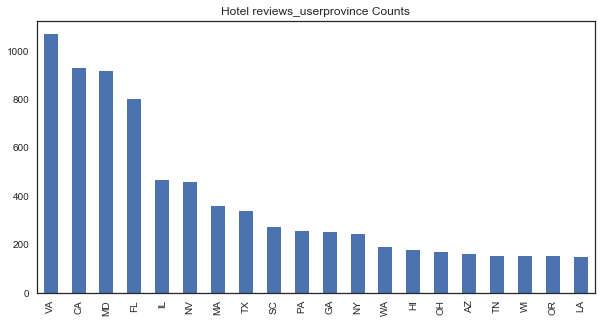

In [12]:
plt.figure(figsize=(10, 5))
df.reviews_userprovince.value_counts().head(20).plot(kind='bar')
plt.title('Hotel reviews_userprovince Counts')
plt.show()

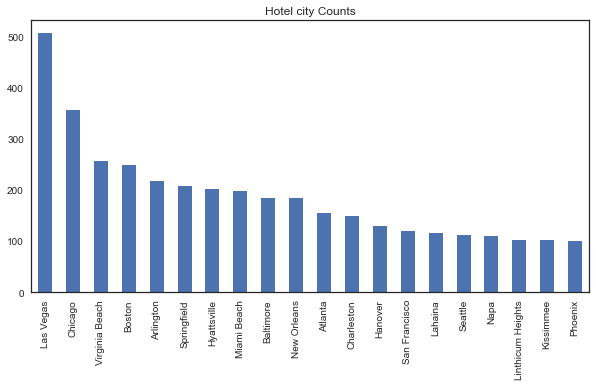

In [13]:
plt.figure(figsize=(10, 5))
df.city.value_counts().head(20).plot(kind='bar')
plt.title('Hotel city Counts')
plt.show()

The Top 4 Cities with the most Hotels 
* Las Vegas 
* Chicago 
* Virginia Beach
* Boston 

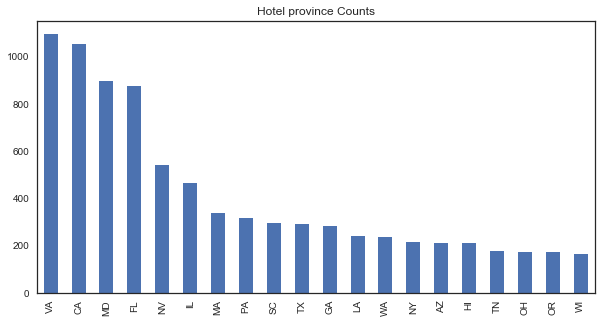

In [14]:
plt.figure(figsize=(10, 5))
df.province.value_counts().head(20).plot(kind='bar')
plt.title('Hotel province Counts')
plt.show()

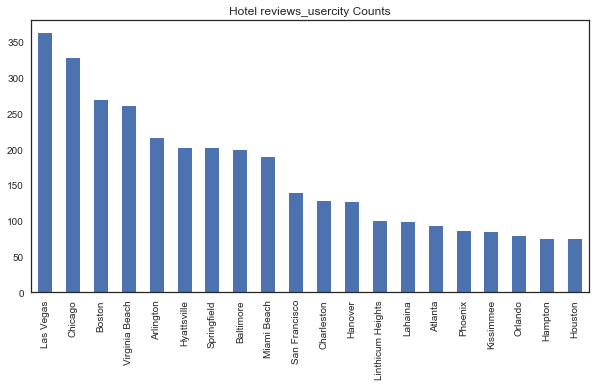

In [15]:
plt.figure(figsize=(10, 5))
df.reviews_usercity.value_counts().head(20).plot(kind='bar')
plt.title('Hotel reviews_usercity Counts')
plt.show()

The Top 4 Cities with the most User Reviews
* Las Vegas 
* Chicago 
* Boston 
* Virginia Beach

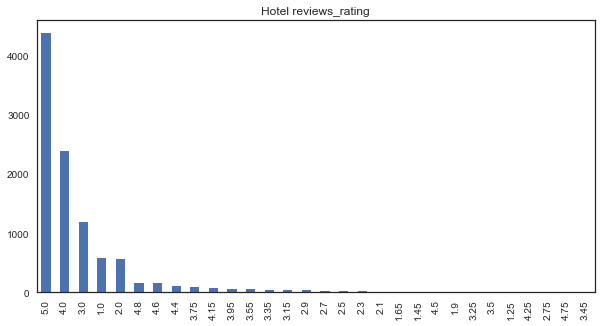

In [16]:
# List of Categories 
plt.figure(figsize=(10, 5))
df.reviews_rating.value_counts().plot(kind='bar')
plt.title('Hotel reviews_rating')
plt.show()

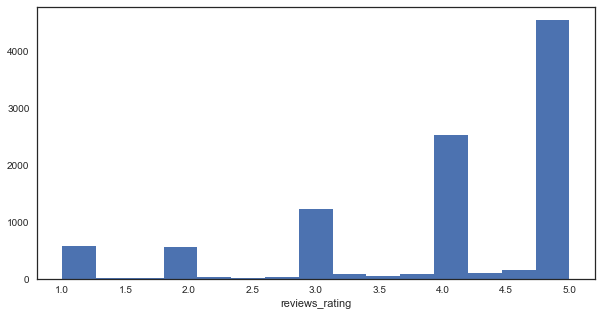

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(df['reviews_rating'], bins = 15) 
plt.xlabel('reviews_rating')
plt.show() 

Here we see that the data has way more reviews that are above 3 stars.  
So we will divide our data set into 2 categories:
* less and equal to 3 stars 
* greater than 3 stars

So we will studies those reviews and see if there is a pattern.  
Similar to sentiment to analysis.   

In [18]:
df = df[df['reviews_rating']>=4]
display(df.head(1))

,dateadded,dateupdated,address,categories,primarycategories,city,country,latitude,longitude,name,postalcode,province,reviews_date,reviews_dateseen,reviews_rating,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username
0,2016-10-30,2018-09-10,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14,2016-08-03,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Rancho Santa Fe,CA,Paula


In [19]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [20]:
import folium
from folium import plugins

In [21]:
df[['categories','primarycategories', 'city', 'country', 'latitude', 'longitude',
    'name', 'postalcode', 'province',]].head()

,categories,primarycategories,city,country,latitude,longitude,name,postalcode,province
0,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA
1,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA
2,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA
4,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,39.155929,-76.716341,Aloft Arundel Mills,21076,MD
5,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,39.155929,-76.716341,Aloft Arundel Mills,21076,MD


### Las Vegas Hotel Locations

In [22]:
df_LV = df[df['city'] =='Las Vegas'][['latitude', 'longitude','name']]
#df_LV.head()

In [23]:
m_LV = folium.Map([36.099900, -115.182800], zoom_start=11)
#m_LV

In [24]:
# mark each hotel as a point
for index, row in df_LV.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m_LV)

In [25]:
# convert to (n, 2) nd-array format for heatmap
Hotel_LV = df_LV[['latitude', 'longitude']].as_matrix()

# plot heatmap
m_LV.add_children(plugins.HeatMap(Hotel_LV, radius=15))
m_LV

### Chicago Hotel Locations

In [26]:
df_CHI = df[df['city'] =='Chicago'][['latitude', 'longitude','name']]

In [27]:
#df_CHI[(df_CHI['name'] == 'Clarion Inn & Suites')|(df_CHI['name'] == 'Rodeway Inn')].head()

In [28]:
m_CHI = folium.Map([41.904050, -87.705900], zoom_start=11)
#m_CHI

In [29]:
# mark each hotel as a point
for index, row in df_CHI.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m_CHI)

In [30]:
# convert to (n, 2) nd-array format for heatmap
Hotel_CHI = df_CHI[['latitude', 'longitude']].as_matrix()

# plot heatmap
m_CHI.add_children(plugins.HeatMap(Hotel_CHI, radius=15))
m_CHI

### Vigirnia Beach Hotel Locations

In [31]:
df_VB = df[df['city'] =='Virginia Beach'][['latitude', 'longitude','name']]
#df_VB

In [32]:
#df_VB[(df_VB['name'] == 'Best Western Plus Virginia Beach')|(df_VB['name'] == 'Virginia Beach Resort Hotel Conference Center')].tail()

In [33]:
m_VB = folium.Map([36.913202, -76.06851], zoom_start=11)
#m_VB

In [34]:
# mark each hotel as a point
for index, row in df_VB.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m_VB)

In [35]:
# convert to (n, 2) nd-array format for heatmap
Hotel_VB = df_VB[['latitude', 'longitude']].as_matrix()

# plot heatmap
m_VB.add_children(plugins.HeatMap(Hotel_CHI, radius=15))
m_VB

### Las Vegas Hotel Locations

In [36]:
df_BOS = df[df['city'] =='Boston'][['latitude', 'longitude','name']]
#df_BOS

In [37]:
m_BOS = folium.Map([42.356958, -71.052850], zoom_start=11)
#m_BOS

In [38]:
# mark each hotel as a point
for index, row in df_BOS.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m_BOS)

In [39]:
# convert to (n, 2) nd-array format for heatmap
Hotel_BOS = df_BOS[['latitude', 'longitude']].as_matrix()

# plot heatmap
m_BOS.add_children(plugins.HeatMap(Hotel_BOS, radius=15))
m_BOS

## Clean Data

In [40]:
df['reviews_title'].head()

0    Best romantic vacation ever!!!!
1               Sweet sweet serenity
2    Amazing Property and Experience
4               ALWAYS GREAT STAY...
5                     Wonderful stay
Name: reviews_title, dtype: object

In [41]:
df['reviews_text'].head()

0    Our experience at Rancho Valencia was absolute...
1    Amazing place. Everyone was extremely warm and...
2    We booked a 3 night stay at Rancho Valencia to...
4    I live in Md and the Aloft is my Home away fro...
5    I stayed here with my family for my daughters ...
Name: reviews_text, dtype: object

In [42]:
#Here we clean the reviews by removing all the  punctuation, 
#removing all that is unnecessary.

df['reviews_title'] = df['reviews_title'].str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
df['reviews_title'] = df['reviews_title'].str.lower()
df['reviews_text'] = df['reviews_text'].str.replace(r'[^a-zA-Z0-9 ]', "",).fillna('')
df['reviews_text'] = df['reviews_text'].str.lower()

In [43]:
df['reviews_title'].head()

0        best romantic vacation ever
1               sweet sweet serenity
2    amazing property and experience
4                  always great stay
5                     wonderful stay
Name: reviews_title, dtype: object

In [44]:
df['reviews_text'].head()

0    our experience at rancho valencia was absolute...
1    amazing place everyone was extremely warm and ...
2    we booked a 3 night stay at rancho valencia to...
4    i live in md and the aloft is my home away fro...
5    i stayed here with my family for my daughters ...
Name: reviews_text, dtype: object

In [45]:
print('The shape of the data is:', df.shape)
display(df.head(1))

The shape of the data is: (7285, 20)


,dateadded,dateupdated,address,categories,primarycategories,city,country,latitude,longitude,name,postalcode,province,reviews_date,reviews_dateseen,reviews_rating,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username
0,2016-10-30,2018-09-10,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14,2016-08-03,5.0,our experience at rancho valencia was absolute...,best romantic vacation ever,Rancho Santa Fe,CA,Paula


## Tokenization

In [46]:
# Will B. started this section to build onto Mel's capstone.

In [47]:
df['words'] = df.reviews_text.str.strip().str.split('[\W_]+')

In [48]:
df['words'].head()

0    [our, experience, at, rancho, valencia, was, a...
1    [amazing, place, everyone, was, extremely, war...
2    [we, booked, a, 3, night, stay, at, rancho, va...
4    [i, live, in, md, and, the, aloft, is, my, hom...
5    [i, stayed, here, with, my, family, for, my, d...
Name: words, dtype: object

In [49]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells

# picked some arbitrary rows to review.
df[['reviews_text','words']][16:20]

,reviews_text,words
18,my husband and i always try to stay at the hotel phillips when we are in kansas city it is our favorite hotel and we have stayed at many i feel at home there and the staff has always been exceptional although we are not particularly demanding guests over the years we have probably spent at least 20 nights there more,"[my, husband, and, i, always, try, to, stay, at, the, hotel, phillips, when, we, are, in, kansas, city, it, is, our, favorite, hotel, and, we, have, stayed, at, many, i, feel, at, home, there, and, the, staff, has, always, been, exceptional, although, we, are, not, particularly, demanding, guests, over, the, years, we, have, probably, spent, at, least, 20, nights, there, more]"
19,just stayed one night but very happy nice comfortable top floor room staff could not have been more helpful great location right by the power light district be prepared to pay for valet parking price of this was offset though by free wine and cheese reception,"[just, stayed, one, night, but, very, happy, nice, comfortable, top, floor, room, staff, could, not, have, been, more, helpful, great, location, right, by, the, power, light, district, be, prepared, to, pay, for, valet, parking, price, of, this, was, offset, though, by, free, wine, and, cheese, reception]"
20,everything was sold out in state college for garths concerts and the inn came up as availablewhat an amazing find ill be making the drive now each visit just to stay there the inn is wonderfully decorated and i so enjoyed browsing all the books breakfast was amazing each morning thank you stephanie and team,"[everything, was, sold, out, in, state, college, for, garths, concerts, and, the, inn, came, up, as, availablewhat, an, amazing, find, ill, be, making, the, drive, now, each, visit, just, to, stay, there, the, inn, is, wonderfully, decorated, and, i, so, enjoyed, browsing, all, the, books, breakfast, was, amazing, each, morning, thank, you, stephanie, and, team]"
21,i work here in perry about 6 days out of the week the people here are very friendly and willing to make your stay better the hotel is great for my simple needs as im away from home the rooms and hallways smell very clean each time i enter and leave i will continue my business here for sure,"[i, work, here, in, perry, about, 6, days, out, of, the, week, the, people, here, are, very, friendly, and, willing, to, make, your, stay, better, the, hotel, is, great, for, my, simple, needs, as, im, away, from, home, the, rooms, and, hallways, smell, very, clean, each, time, i, enter, and, leave, i, will, continue, my, business, here, for, sure]"


In [50]:
# We need to go through and remove stop words, like 'at', 'the', 'that', etc.
# Here's one way to do that.

# We'll do it all in one shot this time.

In [51]:
import nltk
from nltk.corpus import stopwords 

def preprocessing(text):

#    text = text.decode("utf8")

    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]

    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # lemmatize
#    lmtzr = WordNetLemmatizer()
#    tokens = [lmtzr.lemmatize(word) for word in tokens]
#    preprocessed_text= ' '.join(tokens)

    return tokens 

In [52]:
df['filtered_words'] = df['reviews_text']
df['filtered_words'] = df['filtered_words'].apply(preprocessing)

In [53]:
df[['reviews_text','filtered_words']][16:20]

,reviews_text,filtered_words
18,my husband and i always try to stay at the hotel phillips when we are in kansas city it is our favorite hotel and we have stayed at many i feel at home there and the staff has always been exceptional although we are not particularly demanding guests over the years we have probably spent at least 20 nights there more,"[husband, always, try, stay, hotel, phillips, kansas, city, favorite, hotel, stayed, many, feel, home, staff, always, exceptional, although, particularly, demanding, guests, years, probably, spent, least, nights]"
19,just stayed one night but very happy nice comfortable top floor room staff could not have been more helpful great location right by the power light district be prepared to pay for valet parking price of this was offset though by free wine and cheese reception,"[stayed, one, night, happy, nice, comfortable, top, floor, room, staff, could, helpful, great, location, right, power, light, district, prepared, pay, valet, parking, price, offset, though, free, wine, cheese, reception]"
20,everything was sold out in state college for garths concerts and the inn came up as availablewhat an amazing find ill be making the drive now each visit just to stay there the inn is wonderfully decorated and i so enjoyed browsing all the books breakfast was amazing each morning thank you stephanie and team,"[everything, sold, state, college, garths, concerts, inn, came, availablewhat, amazing, find, ill, making, drive, visit, stay, inn, wonderfully, decorated, enjoyed, browsing, books, breakfast, amazing, morning, thank, stephanie, team]"
21,i work here in perry about 6 days out of the week the people here are very friendly and willing to make your stay better the hotel is great for my simple needs as im away from home the rooms and hallways smell very clean each time i enter and leave i will continue my business here for sure,"[work, perry, days, week, people, friendly, willing, make, stay, better, hotel, great, simple, needs, away, home, rooms, hallways, smell, clean, time, enter, leave, continue, business, sure]"


In [54]:
# We can clean this up and combine the above with Mel's.  Just wanted to get something going.

## Function to count words

In [55]:
import collections
def count_words(input):
    total_count = collections.Counter()
    for row in input:
        for word in row:
            total_count[word] += 1
    return total_count

In [56]:
single_words_neg = df[(df.country == 'US')][['filtered_words']].apply(count_words)['filtered_words'].most_common(30)
single_words_neg

[('hotel', 4792),
 ('room', 4019),
 ('staff', 3284),
 ('great', 3132),
 ('stay', 2911),
 ('clean', 2698),
 ('good', 2569),
 ('nice', 2269),
 ('breakfast', 2257),
 ('friendly', 1792),
 ('rooms', 1677),
 ('location', 1538),
 ('comfortable', 1461),
 ('would', 1344),
 ('stayed', 1291),
 ('helpful', 1139),
 ('service', 1055),
 ('area', 1040),
 ('place', 1011),
 ('time', 1007),
 ('well', 992),
 ('one', 955),
 ('pool', 856),
 ('night', 798),
 ('bed', 732),
 ('desk', 729),
 ('front', 714),
 ('back', 699),
 ('get', 686),
 ('also', 682)]

## Function to make word clouds

In [57]:
def mywordcloud(data, title = None):
    wordcloud = WordCloud(
        stopwords=stop_words,
        background_color='white',
        max_words=80,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8,8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

## Sentiment Classification 

In [58]:
#we remove neutral score 3, then group score 4 and 5 to positive (1), 
#and score 1 and 2 to negative (0)

#df[df['reviews_rating'] != 3]
#df['positivity'] = np.where(df['reviews_rating'] > 3, 1, 0)


## What Amenities do reviewer found positive in the Hotels in Particular states. 
## Visualization: States with more positive reviews and states reviews

In [59]:
df.head(1)

,dateadded,dateupdated,address,categories,primarycategories,city,country,latitude,longitude,name,...,reviews_date,reviews_dateseen,reviews_rating,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username,words,filtered_words
0,2016-10-30,2018-09-10,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reservations,Resorts,Resort,Hotel",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2013-11-14,2016-08-03,5.0,our experience at rancho valencia was absolutely perfect from beginning to end we felt special and very happy during our stayed i would come back in a heart beat,best romantic vacation ever,Rancho Santa Fe,CA,Paula,"[our, experience, at, rancho, valencia, was, absolutely, perfect, from, beginning, to, end, we, felt, special, and, very, happy, during, our, stayed, i, would, come, back, in, a, heart, beat]","[experience, rancho, valencia, absolutely, perfect, beginning, end, felt, special, happy, stayed, would, come, back, heart, beat]"


## Create Training and Test Set

In [60]:
## Looking at what people like compare to where the city they are going to is located 
## String substitution 
## Create a feature that's city_state

## Sentiment Analysis ===> Figure out what are the words that  Don't Do  
## Modeling algorithm tha works with class imbalance 
## What is a bad review ?
## Look at the reviews that ar 3 star review and 4 star review look  like 

## What do people who go to California like ? 
## Topic model of all the reviews that are less than 4 stars
## Look at correlation between Topics and stars 

## Look only at positive reviews Try to predict the state from the words 
## Different reviews look only at the positive ones. Reduce it down to 10 components 
## Use the 10 components 

## 

In [72]:
Y = df['province']
X = df['reviews_text']

In [62]:
from sklearn.model_selection import train_test_split

#  Create Training and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## Create Features Using tf-idf

### Create Vectorizer for Text Reviews

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("Extracting features from the reviews_text in dataset using a vectorizer")
t0 = time.clock()
Xvectorizer = TfidfVectorizer(max_df=.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True, #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                             ngram_range=(1, 3)
                             )

#Find Vocab words on the whole articles 
#Applying the vectorizer to X_train and X_test
X_train_tfidf=Xvectorizer.fit_transform(X_train)
X_test_tfidf=Xvectorizer.transform(X_test)
vocab = Xvectorizer.vocabulary_

print('\nXvectorizer on reviews_text in the dataset done in '+'%s seconds'% (time.clock() - t0))

Extracting features from the reviews_text in dataset using a vectorizer

Xvectorizer on reviews_text in the dataset done in 3.3025909999999996 seconds


In [64]:
X_train.head(1)

7850    we found indigo through searching on trip advisor we were looking for a unique boutique type hotel with competitive rates we loved this hotel it was definitely competitively priced and significantly cheaper than the big flags downtown but the value is amazing big spacious rooms an enormous wonderful shower comfortable bedding clean throughout warm and friendly staff great breakfasts complimentary more
Name: reviews_text, dtype: object

In [65]:
Y_train.head(1)

7850    PA
Name: province, dtype: object

In [66]:
ntopics = 5
terms = Xvectorizer.get_feature_names()
#ntopics = 5, 10, 20, 50, 100 ===> Pipeline

In [67]:
#terms

## LSA

In [68]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
#Our SVD data reducer.  We are going to reduce the feature space from 84939 to 1000.
t0 = time.clock()
svd= TruncatedSVD(ntopics, random_state = 0)
lsa = make_pipeline(svd, Normalizer(copy=False))


# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

print('LSA done in '+'%s seconds'% (time.clock() - t0))


LSA done in 0.29706900000000047 seconds


## LDA

In [70]:
t0 = time.clock()
lda = LatentDirichletAllocation(ntopics, random_state = 0)


X_train_lda = lda.fit_transform(X_train_tfidf)
X_test_lda = lda.transform(X_test_tfidf)

print('LDA done in '+'%s seconds'% (time.clock() - t0))

LDA done in 13.086254999999994 seconds


In [71]:
## Do the component part 
## Advanced NLP ===> Read that very carefully 
## Advanced Text Extraction/ How to choose which ma